In [1]:
import splat
import splat.empirical as spe
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import popsims
%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
x, y=spe.typeToTeff(20, ref='mamajek')

In [3]:
from popsims.relations import LITERATURE_POLYNOMIALS

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


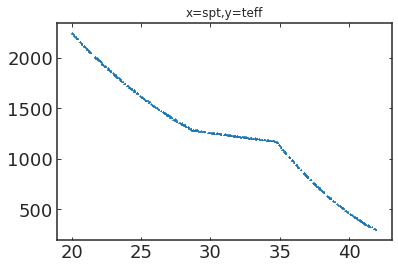

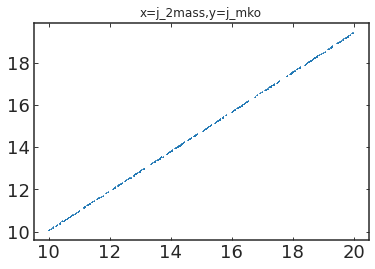

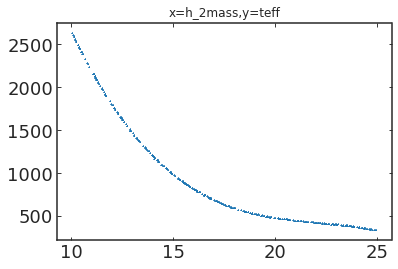

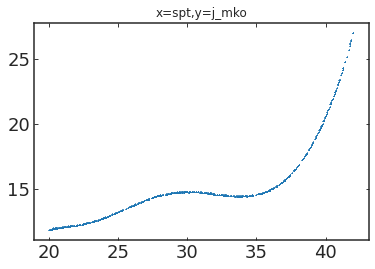

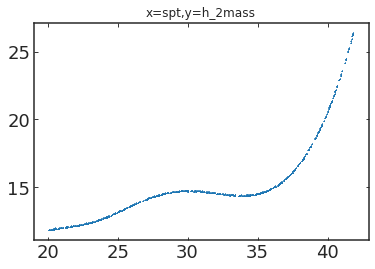

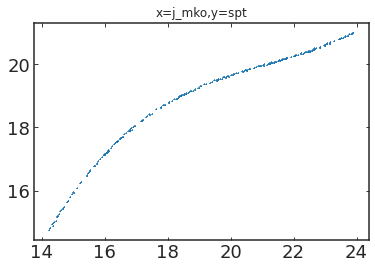

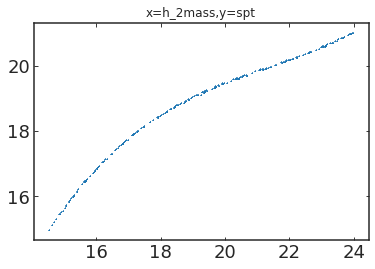

In [4]:
for k in LITERATURE_POLYNOMIALS['kirkpatrick2021']:
    pol= LITERATURE_POLYNOMIALS['kirkpatrick2021'][k]
    
    xs= np.random.uniform(10, 45, 1000)
    ys=popsims.tools.apply_polynomial_relation(pol, xs, xerr=0.0, nsample=1000)
    
    fig, ax=plt.subplots()
    ax.scatter(xs, ys[0], s=1, marker='+')
    ax.set(title=k)
    

In [5]:
#x=popsims.simulate_spts(nsample=int(1e5), model_name='baraffe2003')
#t =x['sing_evol']['temperature'].value
#s=popsims.relations.teff_to_spt_kirkpatrick(t)
x=popsims.make_systems(nsample=int(1e5),model_name='baraffe2003')

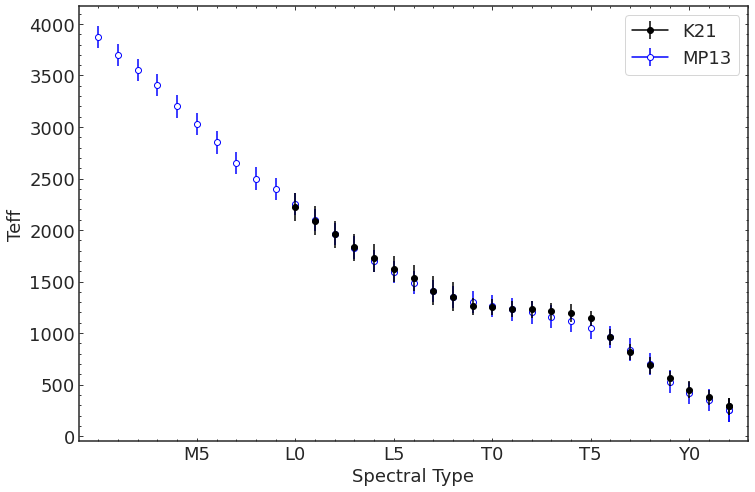

In [6]:
fig, ax=plt.subplots(figsize=(12, 8))
for a in np.arange(10, 43):
    ab=popsims.relations.spt_to_teff_kirkpatrick(a)
    ax.errorbar(a, ab[0], yerr=ab[-1], marker='o', c='k')
    
    ab_m=spe.typeToTeff(float(a), ref='mamajek')
    
    ax.errorbar(a, ab_m[0].value, yerr=ab_m[-1].value, marker='o', color='blue', \
                mfc='white', zorder=1)
    
    ax.set(xlabel='Spectral Type', ylabel='Teff')
    ax.minorticks_on()
    
ax.errorbar(a, ab[0], yerr=ab[-1], marker='o', c='k', label='K21')
ax.errorbar(a, ab_m[0].value, yerr=ab_m[-1].value, marker='o', color='blue', \
                mfc='white', zorder=1, label='MP13')

#teffs=np.random.uniform(100, 4000, 10_0000)
#ax.scatter( s, t, s=1)
#ax.scatter(x['prim_spt'], x['temperature'], s=.05)
ax.legend()
ax.set(xlim=[9, 43])
ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
plt.savefig('../figures/spt_teff.pdf')

In [7]:
def jh_mag(spt):
    j= popsims.relations.absolute_mag_j(spt, ref='kirkpatrick2021', syst='mko')
    h= popsims.relations.absolute_mag_h(spt, ref='kirkpatrick2021', syst='2mass')
    return [j, h]

def jh_mag_dupuy(spt):
    j= spe.typeToMag(spt, 'MKO J', ref='dupuy2012')
    h= spe.typeToMag(spt, 'MKO H', ref='dupuy2012')
    return [j, h]

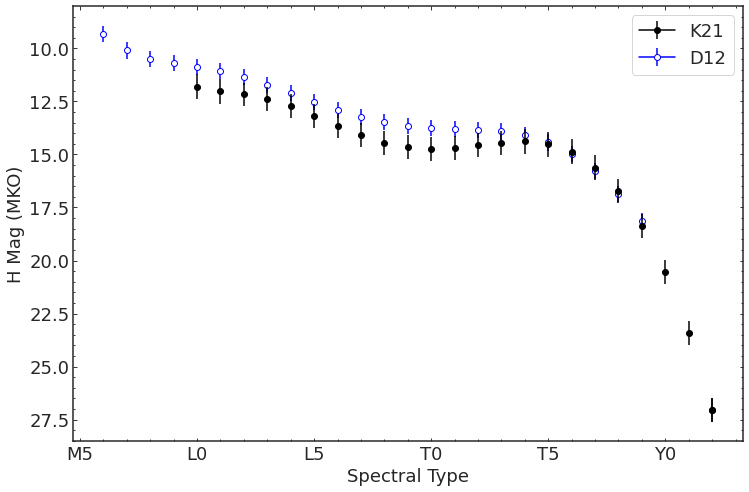

In [8]:
fig, ax=plt.subplots(figsize=(12, 8))
for a in np.arange(10, 43):
    jh= jh_mag(a)
    
    ax.errorbar(a, jh[-1][0], yerr=jh[-1][-1], marker='o', c='k')
    
    
    jhd= jh_mag_dupuy(a)
    
    ax.errorbar(a, jhd[-1][0], yerr=jhd[-1][-1], marker='o', color='blue', \
                mfc='white', zorder=1)
    
    

ax.errorbar(a, jh[-1][0], yerr=jh[-1][-1], marker='o', c='k', label='K21')
    
ax.errorbar(a, jhd[-1][0], yerr=jhd[-1][-1], marker='o', color='blue', \
                mfc='white', zorder=1, label='D12')

ax.set(xlabel='Spectral Type', ylabel='H Mag (MKO)')
ax.invert_yaxis()
ax.minorticks_on()
ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.legend()
plt.savefig('../figures/spt_hmag.pdf')

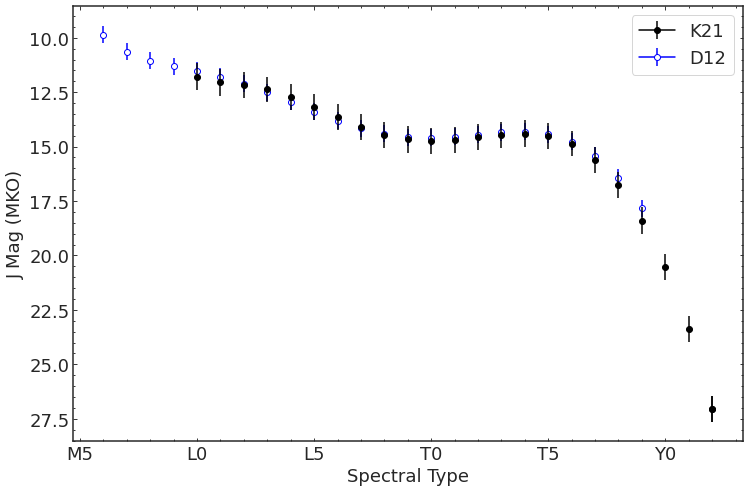

In [9]:
fig, ax=plt.subplots(figsize=(12, 8))
for a in np.arange(10, 43):
    jh= jh_mag(a)
    
    ax.errorbar(a, jh[0][0], yerr=jh[0][-1], marker='o', c='k')
    
    
    jhd= jh_mag_dupuy(a)
    
    ax.errorbar(a, jhd[0][0], yerr=jhd[0][-1], marker='o', color='blue', \
                mfc='white', zorder=1)

ax.errorbar(a, jh[0][0], yerr=jh[0][-1], marker='o', c='k', label='K21')

ax.errorbar(a, jhd[0][0], yerr=jhd[0][-1], marker='o', color='blue',  mfc='white', zorder=1, label='D12')

ax.set(xlabel='Spectral Type', ylabel='J Mag (MKO)')
ax.invert_yaxis()
ax.minorticks_on()
ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.legend()
plt.savefig('../figures/spt_jmag.pdf')

In [10]:
import popsims.galaxy as gal

In [12]:
gal.avr_sharma([])[0]

array([], dtype=float64)